# Spectral analysis
compute power spectral density (PSD) of local field potential (LFP) 

## Set-up

#### imports

In [1]:
# general imports
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# lab imports
from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum

#### settings

In [2]:
# Dataset details
FS = 500 # sampling frequency (Hz)
N_ARRAYS = 16 # number of arrays
N_CHANNELS = 64 # number of channels per array
# SESSIONS = []

In [3]:
# Settings
 
# set directories
PATH = 'G:/Shared drives/v1_v4_1024/'

# choose session
SESSION = 'A_SNR_041018'

# analysis settings
F_RANGE = [1, FS/2] # frequency range for spectral analysis - skip freq=0

## Spectral Analysis

#### load example file

In [4]:
# load example file
fname_in = PATH + f'data/example_array_LFP.mat'
data_in = loadmat(fname_in)

# print info
print('The imported data file contains a dictionary with the following keys:')
print(f'\t{data_in.keys()}')
print(f"\nThe variable data['lfp'] stores the signals of interest...")
print(f'\tNumber of channels in array: \t{data_in["lfp"].shape[1]}')
print(f'\tSignal duration: \t{data_in["lfp"].shape[0]/FS} sec')


The imported data file contains a dictionary with the following keys:
	dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'channel_names', 'channel_ids', 'file_origin', 'connector_ID', 'connector_pinID', 'nev_dig_factor', 'nb_sorted_units', 'nev_hi_freq_order', 'nev_hi_freq_type', 'nev_lo_freq_order', 'nev_lo_freq_type', 'nsx_hi_freq_order', 'nsx_lo_freq_order', 'nsx_hi_freq_type', 'nsx_lo_freq_type', 'description', 'nsx', 'Electrode_ID', 'NSP_ID', 'within_NSP_electrode_ID', 'Array_ID', 'within_array_electrode_ID', 'cortical_area', 'schematic_X_position', 'schematic_Y_position'])

The variable data['lfp'] stores the signals of interest...
	Number of channels in array: 	64
	Signal duration: 	294.22 sec


Text(0.5, 1.0, 'Power spectrum')

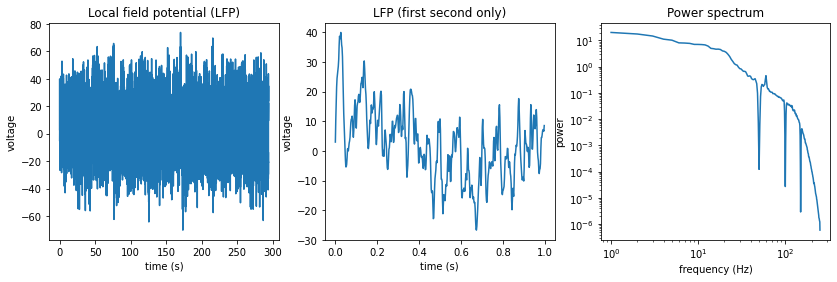

In [5]:
# plot LFP signal and PSD for an example channel 

# take data for first channel
lfp = data_in['lfp'][:, 0]
time = create_times(len(lfp)/FS, FS)

# compute psd
freq, psd = compute_spectrum(lfp, FS, f_range=F_RANGE) 

# plot
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=[14,4])

ax0.plot(time, lfp)
ax0.set(xlabel="time (s)", ylabel="voltage")
ax0.set_title("Local field potential (LFP)")

ax1.plot(time[:FS], lfp[:FS])
ax1.set(xlabel="time (s)", ylabel="voltage")
ax1.set_title("LFP (first second only)")

ax2.loglog(freq, psd)
ax2.set(xlabel="frequency (Hz)", ylabel="power")
ax2.set_title("Power spectrum")



#### compute PSD for each array in session

In [6]:
# load data file for each array and compute the PSD of the LFP signals
 
# initialize variables (i.e. create empty arrays to be filled with results for each file)
psd = np.zeros([N_ARRAYS*N_CHANNELS, len(freq)]) # shape: n channels (1024) x n frequencies 
psd_mean = np.zeros([N_ARRAYS, len(freq)]) # shape: array x frequency 

# loop through files
for i_array in range(N_ARRAYS):
    # import data
    fname_in = PATH + f'data/{SESSION}/lfp/NSP1_array{i_array}_LFP.mat'
    data_in = loadmat(fname_in)

    # compute power spectrum
    _, spectrum_i = compute_spectrum(data_in['lfp'].T, FS, f_range=F_RANGE) # here, we use '.T' to transpose the array so the first dimension is channels
    psd[i_array*N_CHANNELS:(i_array+1)*N_CHANNELS] = spectrum_i # save results of each file to a single variable
    psd_mean[i_array] = np.mean(spectrum_i, axis=0) # save average results of each file to a single variable

# save results
np.save(PATH + f'/data/results/{SESSION}_lfp_spectra.npy', psd)


FileNotFoundError: [Errno 2] No such file or directory: 'G:/Shared drives/v1_v4_1024/data/A_SNR_041018/lfp/NSP1_array0_LFP.mat'